In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

dataset_raw = pd.read_excel('данные_квартиры.xlsx', usecols=lambda x: 'Unnamed' not in x, skiprows=1);

Загрузим данные о ценах на нижегородские квартиры. Для работы с таблицей будем использовать программная библиотеку языка Python для обработки и анализа данных pandas.

In [2]:
print(dataset_raw.shape[0], " - число объектов");
print(dataset_raw.shape[1]-1, " - число признаков");
print(dataset_raw.head());

2600  - число объектов
30  - число признаков
   Тип рынка              Функциональная зона  Общая площадь,\nкв.м  \
0  Вторичный  Многоквартирная жилая застройка             45.700001   
1  Вторичный  Многоквартирная жилая застройка             38.099998   
2  Вторичный  Многоквартирная жилая застройка             53.400002   
3  Вторичный  Многоквартирная жилая застройка             56.000000   
4  Вторичный  Многоквартирная жилая застройка             43.000000   

   Жилая площадь,\nкв.м  Площадь кухни,\nкв.м  Высота потолков, м  \
0             27.299999                   7.0                 NaN   
1             22.700001                   7.0                 NaN   
2             25.000000                  14.0                 NaN   
3             33.200001                   8.6                 NaN   
4             19.000000                  12.0                 NaN   

   Год постройки                   Тип дома   Класс  Этаж  ...  \
0           1975   Советская более 5 этажей  Эк

Таблица содержит данные о 2600 квартир, выставленных на продажу в г.Нижнем Новгороде. Данные о каждой квартире характеризуют 30 признаков, включающих: цену (в руб.), удаленность от других объектов инфраструктуры, рынка (вторичка или новостройка), количество этажей, тип дома, количество комнат, номер этажа и общая площадь квартиры (в кв.м).

In [3]:
for i in range(1, dataset_raw.columns.size):
    col = str(i)+') '+dataset_raw.columns[i].replace('\n', ' ');
    print(col);

1) Функциональная зона
2) Общая площадь, кв.м
3) Жилая площадь, кв.м
4) Площадь кухни, кв.м
5) Высота потолков, м
6) Год постройки
7) Тип дома
8) Класс
9) Этаж
10) Этажность
11) Тип этажа
12) Состояние ремонта
13) Количество комнат
14) Парковка
15) Материал стен
16) Цена предложения, руб.
17) Удельная цена, руб./кв.м
18) Дата создания
19) Дата парсинга
20) Дата послед. проверки
21) Дата снятия (продажи)
22) Актуальность на дату послед. проверки
23) Колич.  Просмотр.
24) Колич.  Просм. в день
25) Остановка м
26) Парк м
27) Центр км
28) Станция метро м
29) Школа м
30) Детский сад м


Среди качественных признаков можно выделить:
1. *Бинарные* - Тип рынка;
2. *Категориальные*(*Факторные*) - все остальные;

In [4]:
dataset_raw.describe(include=['object'])

,Тип рынка,Функциональная зона,Тип дома,Класс,Тип этажа,Состояние ремонта,Количество комнат,Парковка,Материал стен,Дата создания,Дата парсинга,Дата послед. проверки,Дата снятия (продажи),Актуальность на дату послед. проверки
count,2600,2600,2600,2600,2493,1017,2600,2600,2600,2600,2600,2600,1249,2600
unique,2,25,5,4,3,4,7,2,4,193,145,146,143,2
top,Вторичный,Многоквартирная жилая застройка,Советская до 5 этажей вкл,Эконом,Средний,Косметический,2,Нет,Кирпичный,22.04.2022,06.06.2022,26.09.2022,07.06.2022,Актуально
freq,2207,1721,1042,2587,1702,587,979,1510,1508,122,206,1346,76,1351


Количественные признаки представляют собой непрерывные числовые величины.

In [5]:
dataset_raw.describe(include=['number'])

,"Общая площадь,\nкв.м","Жилая площадь,\nкв.м","Площадь кухни,\nкв.м","Высота потолков, м",Год постройки,Этаж,Этажность,"Цена предложения,\nруб.","Удельная цена, руб./кв.м",Колич. Просмотр.,Колич. Просм. в день,Остановка\nм,Парк\nм,Центр\nкм,Станция метро\nм,Школа\nм,Детский сад\nм
count,2600.000000,2600.000000,2600.000000,300.000000,2600.000000,2600.000000,2572.000000,2.600000e+03,2600.000000,2600.00000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2467.000000,2467.000000
mean,51.142385,30.031808,8.735500,2.567000,1982.953462,5.168462,8.529160,6.351669e+06,123348.136538,26.43500,0.304815,259.069615,748.081923,8.088462,2638.335385,382.493312,321.945683
std,26.735726,15.717637,4.639916,0.113963,22.679368,4.293763,4.588844,4.142744e+06,36737.216399,24.62378,0.877778,218.972639,560.165029,4.008919,1934.772706,331.048900,293.858959
min,13.400000,7.200000,3.000000,2.000000,1916.000000,1.000000,1.000000,1.000000e+06,13750.000000,1.00000,0.000000,0.000000,43.000000,0.000000,29.000000,43.000000,29.000000
25%,35.000000,18.100000,6.000000,2.500000,1967.000000,2.000000,5.000000,4.000000e+06,99426.250000,7.00000,0.020000,124.000000,328.000000,5.000000,1057.500000,197.000000,151.000000
50%,45.000000,28.000000,7.000000,2.500000,1977.000000,4.000000,9.000000,5.200000e+06,114991.500000,26.00000,0.050000,199.000000,610.000000,8.000000,1967.000000,301.000000,244.000000
75%,60.000000,38.000000,10.000000,2.700000,2000.000000,7.000000,10.000000,7.202500e+06,139155.250000,35.00000,0.250000,304.000000,1019.000000,11.000000,4276.250000,446.000000,386.000000
max,611.000000,200.000000,60.000000,3.000000,2024.000000,25.000000,27.000000,6.100000e+07,397589.000000,369.00000,20.000000,1252.000000,4963.000000,19.000000,11760.000000,3530.000000,4369.000000


Перед тем как взаимодействовать с данными нам необходимо их подготовить - убрать пропущенные значения, очистить от выбросов.

Сначала необходимо узнать количество пропущенных значений в каждом из столбцов:

In [6]:
print(dataset_raw.isnull().sum());

Тип рынка                                   0
Функциональная зона                         0
Общая площадь,\nкв.м                        0
Жилая площадь,\nкв.м                        0
Площадь кухни,\nкв.м                        0
Высота потолков, м                       2300
Год постройки                               0
Тип дома                                    0
Класс                                       0
Этаж                                        0
Этажность                                  28
Тип этажа                                 107
Состояние ремонта                        1583
Количество комнат                           0
Парковка                                    0
Материал стен                               0
Цена предложения,\nруб.                     0
Удельная цена, руб./кв.м                    0
Дата создания                               0
Дата парсинга                               0
Дата послед. проверки                       0
Дата снятия (продажи)             

Признаки, по которым количество пропущенных значений составляет ~1%, можно убрать из таблицы (```"Этажность"```).<br>
Можно заметить, что в некоторых столбцах значения заведомо оставлены пустыми, например ```"Высота потолков"``` - 2300/2600, для этого параметра я указал среднее значение по СП. Для таких параметров как ```"Состояние ремонта"``` и ```"Дата снятия (продажи)"``` указать среднее значение не получится, их следует просто заполнить пустыми константами np.nan.<br>
Признак ```"Количество комнат"``` мы ранее причислили к качественным, что не совсем верно. Нам следует заменить значение ```"Студия"``` на ```float(0)```, чтобы определить признак в дискретные числовые величины.<br>
Для числовых параметров удобно использовать медиану для заполнения пропущенных элементов (```"Школа м"```, ```"Детский сад м"```), а для качественных - моду (```"Тип этажа"```).

In [7]:
for i in range(dataset_raw.columns.size):
    if(dataset_raw[dataset_raw.columns[i]].isnull().sum() and float(dataset_raw[dataset_raw.columns[i]].isnull().sum()) < dataset_raw.shape[0]/90):
        dataset_raw.dropna(subset=[dataset_raw.columns[i]], inplace=True)

dataset_raw["Высота потолков, м"].fillna(2.65, inplace=True)
dataset_raw["Тип этажа"].fillna(dataset_raw["Тип этажа"].mode().iloc[0], inplace=True)
dataset_raw["Состояние ремонта"].fillna(np.nan, inplace=True)
dataset_raw.loc[dataset_raw["Количество комнат"] == "Студия", "Количество комнат"] = 0
dataset_raw["Дата снятия (продажи)"].fillna(np.nan, inplace=True)
dataset_raw["Школа\nм"].fillna(dataset_raw["Школа\nм"].median(axis = 0), inplace=True)
dataset_raw["Детский сад\nм"].fillna(dataset_raw["Детский сад\nм"].median(axis = 0), inplace=True)

Таким образом получим данные без пропущенных элементов:

In [8]:
print(dataset_raw.isnull().sum());

Тип рынка                                   0
Функциональная зона                         0
Общая площадь,\nкв.м                        0
Жилая площадь,\nкв.м                        0
Площадь кухни,\nкв.м                        0
Высота потолков, м                          0
Год постройки                               0
Тип дома                                    0
Класс                                       0
Этаж                                        0
Этажность                                   0
Тип этажа                                   0
Состояние ремонта                        1568
Количество комнат                           0
Парковка                                    0
Материал стен                               0
Цена предложения,\nруб.                     0
Удельная цена, руб./кв.м                    0
Дата создания                               0
Дата парсинга                               0
Дата послед. проверки                       0
Дата снятия (продажи)             

Перейдем к очистке данных от выбросов. Для этого уберем параметры выходящие за квантиль 0.005 и 0.995 соответственно, таким образом мы уберем данных выходящие за пределы 99% всех значений. Хотя визуально представленные графики не отличаются, значения у них различны, что видно при выводе в консоль

2572->2554
False


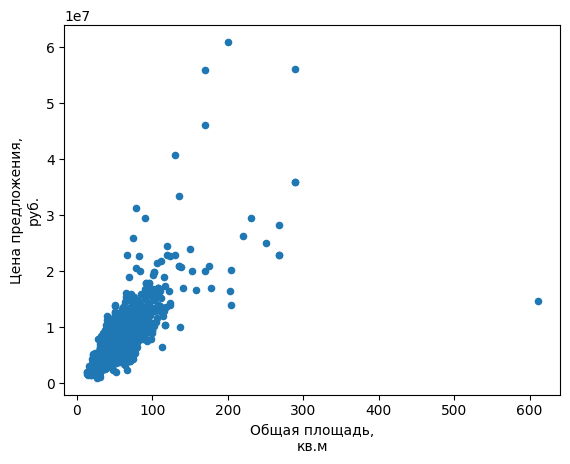

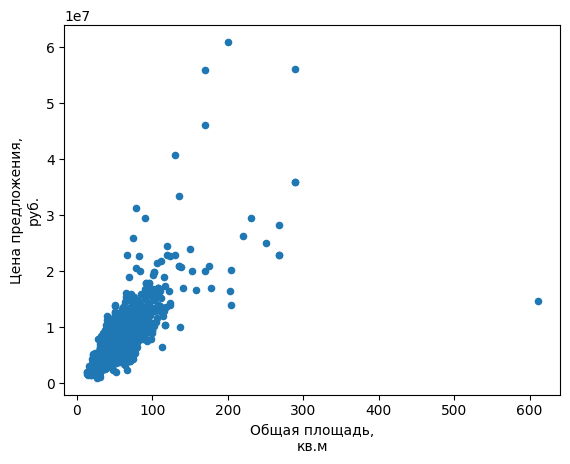

In [9]:
plot2 = dataset_raw.plot(kind='scatter', x="Общая площадь,\nкв.м", y="Цена предложения,\nруб.");

print(dataset_raw.shape[0], end='->');
numdata = dataset_raw.select_dtypes(include=["number"]);
for i in range(numdata.columns.size):
    dataset = dataset_raw[
    (dataset_raw[numdata.columns[i]] >= dataset_raw[numdata.columns[i]].quantile(0.005)) & (dataset_raw[numdata.columns[i]] <= dataset_raw[numdata.columns[i]].quantile(0.995))];
print(dataset.shape[0]);

plot1 = dataset_raw.plot(kind='scatter', x="Общая площадь,\nкв.м", y="Цена предложения,\nруб.");

print(plot1 == plot2)

Перейдем к общему графическому предствлению данных.</b>
Ниже при помощи гистограммы представлено распределение значений ```"Цены предложения"``` на указанном графике.

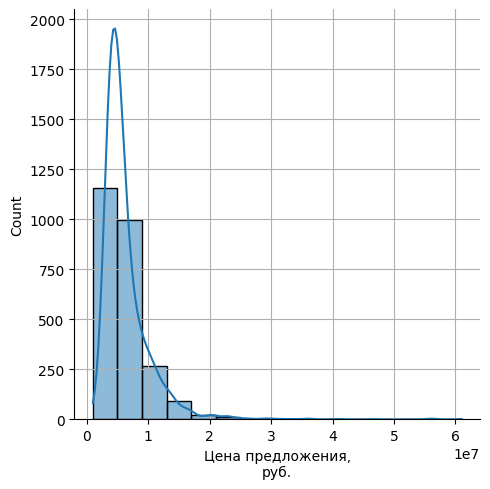

In [10]:
sns.displot(dataset["Цена предложения,\nруб."], bins=15, kde=True);
plt.grid();

Составим распределение для всех признаков: 

In [11]:
#pd.plotting.scatter_matrix(dataset, figsize=(10,8))

In [12]:
#pd.plotting.hist_frame(dataset, figsize=(10,8))

Рассмотрим графики зависимости параметров относительно ключевого признака ```"Цены предложения"```.

In [13]:
# for i in range(dataset.columns.size):
#     sns.jointplot(x="Цена предложения,\nруб.", y=dataset.columns[i], alpha=.40, data=dataset);

In [14]:
# pd.plotting.scatter_matrix(dataset_raw, figsize=(10,8))

                          Общая площадь,\nкв.м  Жилая площадь,\nкв.м  \
Общая площадь,\nкв.м                  1.000000              0.852188   
Жилая площадь,\nкв.м                  0.852188              1.000000   
Площадь кухни,\nкв.м                  0.566040              0.372140   
Высота потолков, м                    0.010982              0.096847   
Год постройки                         0.233977              0.042241   
Этаж                                  0.108429             -0.018573   
Этажность                             0.159894             -0.016950   
Цена предложения,\nруб.               0.755754              0.706426   
Удельная цена, руб./кв.м              0.049572             -0.045805   
Колич.  Просмотр.                     0.006126              0.005621   
Колич.  Просм. в день                -0.042642             -0.032114   
Остановка\nм                          0.062630             -0.039717   
Парк\nм                              -0.045350             -0.10

<AxesSubplot:>

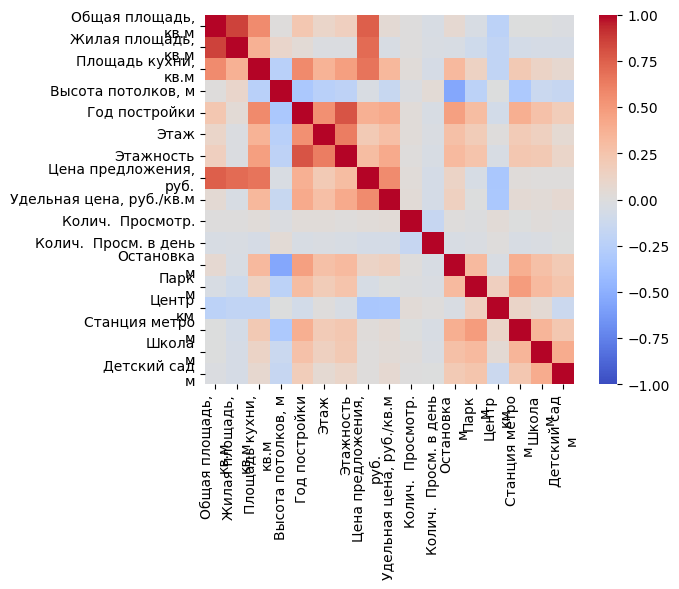

In [15]:
corr_mat = dataset.corr();
print(corr_mat);
sns.heatmap(corr_mat, vmin=-1, vmax=1, square=True, cmap='coolwarm')
#sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm');

Выведем коэффициенты корреляции, больше заданного значения:

In [16]:
corr_mat['Цена предложения,\nруб.'].where(corr_mat['Цена предложения,\nруб.']>0.3)

Общая площадь,\nкв.м        0.755754
Жилая площадь,\nкв.м        0.706426
Площадь кухни,\nкв.м        0.666117
Высота потолков, м               NaN
Год постройки               0.380861
Этаж                             NaN
Этажность                   0.300050
Цена предложения,\nруб.     1.000000
Удельная цена, руб./кв.м    0.566983
Колич.  Просмотр.                NaN
Колич.  Просм. в день            NaN
Остановка\nм                     NaN
Парк\nм                          NaN
Центр\nкм                        NaN
Станция метро\nм                 NaN
Школа\nм                         NaN
Детский сад\nм                   NaN
Name: Цена предложения,\nруб., dtype: float64

Следующие параметры больше других влияют на окончательную стоимость квартиры:
1. ```Общая площадь, м```
2. ```Жилая площадь, кв.м```
3. ```Площадь кухни, кв.м```
4. ```Год постройки```